<a href="https://colab.research.google.com/github/Amol68/SAP/blob/main/13_09_2123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [ ]:
churn_df = pd.read_csv("https://raw.githubusercontent.com/Code-Unnati/Advance-Course/master/Module-1/Unit-2/Unit-2.2/ChurnData.csv")

In [ ]:
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [ ]:
churn_df.isnull()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',  'callcard', 'wireless','churn']]
churn_df['churn']=churn_df['churn'].astype('int')
print(churn_df.shape)




(200, 10)


In [ ]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [ ]:
X=churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless']]
X=X.drop(['tenure'], axis=1)
X=X.drop(['callcard'], axis=1)
Y=churn_df[['churn']]
np_X=np.asanyarray(X)
np_Y=np.asanyarray(Y)

In [ ]:
np_X

array([[ 33.,   7., 136., ...,   5.,   0.,   1.],
       [ 33.,  12.,  33., ...,   0.,   0.,   0.],
       [ 30.,   9.,  30., ...,   2.,   0.,   0.],
       ...,
       [ 32.,  10.,  47., ...,  10.,   0.,   0.],
       [ 30.,   0.,  25., ...,   5.,   0.,   1.],
       [ 50.,  16., 190., ...,  22.,   1.,   1.]])

In [ ]:
np_X.shape

(200, 7)

In [ ]:
from sklearn.preprocessing import StandardScaler ### Preprocess the data
std_scl=StandardScaler()
std_scl.fit(np_X)
np_X_procs=std_scl.transform(np_X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(np_X_procs, np_Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape, Y_train.shape)
print ('Test set:', X_test.shape, Y_test.shape)



Train set: (160, 7) (160, 1)
Test set: (40, 7) (40, 1)


In [ ]:
model=LogisticRegression(C=0.01,solver='liblinear',verbose=1)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

[LibLinear]

In [ ]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
Y_pred=model.predict(X_test)
Y_pred_prob=model.predict_proba(X_test)
print(Y_pred)
print('\n')
print((Y_pred_prob))

[0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1
 0 0 1]


[[0.54754698 0.45245302]
 [0.51210867 0.48789133]
 [0.57879565 0.42120435]
 [0.6248826  0.3751174 ]
 [0.57934012 0.42065988]
 [0.61850975 0.38149025]
 [0.55472421 0.44527579]
 [0.53096739 0.46903261]
 [0.48215909 0.51784091]
 [0.53957351 0.46042649]
 [0.49584667 0.50415333]
 [0.54144573 0.45855427]
 [0.53163422 0.46836578]
 [0.48690408 0.51309592]
 [0.69655649 0.30344351]
 [0.51989736 0.48010264]
 [0.54997685 0.45002315]
 [0.38957176 0.61042824]
 [0.49373662 0.50626338]
 [0.55503588 0.44496412]
 [0.55069931 0.44930069]
 [0.48004902 0.51995098]
 [0.59333792 0.40666208]
 [0.51025545 0.48974455]
 [0.44706149 0.55293851]
 [0.69815616 0.30184384]
 [0.5424228  0.4575772 ]
 [0.45736181 0.54263819]
 [0.56178634 0.43821366]
 [0.68365768 0.31634232]
 [0.68110681 0.31889319]
 [0.47207844 0.52792156]
 [0.4219166  0.5780834 ]
 [0.72806669 0.27193331]
 [0.57242076 0.42757924]
 [0.67629488 0.32370512]
 [0.47643293 0.

**Confusion Matrix**

Model achieved a classification accuracy of:	0.625


Model Confusion Matrix


Jaccard Similarity Score:	0.2857142857142857


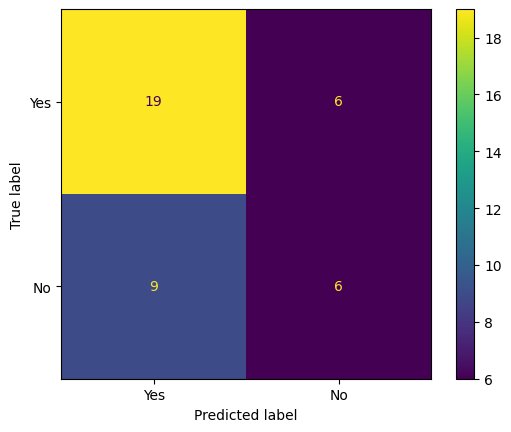

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print("Model achieved a classification accuracy of:",end='\t')
print(accuracy_score(Y_test,Y_pred))
dsp=ConfusionMatrixDisplay(confusion_matrix(Y_test,Y_pred),display_labels=["Yes","No"])
print('\n')
dsp.plot()
print("Model Confusion Matrix")
from sklearn.metrics import jaccard_score
print('\n')
print("Jaccard Similarity Score:", end='\t')
print(jaccard_score(Y_test,Y_pred))